### **PYCARET**

**DESKRIPSI DATASET**

Di antara padi bersertifikat yang ditanam di Turki, spesies Osmancik, yang memiliki area penanaman besar sejak 1997 dan spesies Cammeo yang ditanam sejak 2014 telah dipilih untuk penelitian ini. Ketika melihat karakteristik umum spesies Osmancik, mereka memiliki penampilan yang lebar, panjang, kaca dan kusam. Ketika melihat karakteristik umum dari spesies Cammeo, mereka memiliki penampilan yang lebar dan panjang, seperti kaca dan kusam. Sebanyak 3810 gambar butiran beras diambil untuk dua spesies, diproses dan kesimpulan fitur dibuat. 7 fitur morfologis diperoleh untuk setiap butir beras. Pada dataset ini tidak ada data yang missing value. Dataset ini adalah dataset klasifikasi.

**INFORMASI FITUR**

- Area atau Daerah : Mengembalikan jumlah piksel dalam batas butir beras. Tipe data pada fitur ini adalah numerik.
- Perimeter : Menghitung keliling dengan menghitung jarak antara piksel di sekitar batas butir beras. Tipe data pada fitur ini adalah numerik.
- Major Axis Length atau Panjang Sumbu Utama : Garis terpanjang yang dapat ditarik pada butiran beras, yaitu jarak sumbu utama. Tipe data pada fitur ini adalah numerik.
- Minor Axis Length atau Panjang Sumbu Kecil : Garis terpendek yang dapat ditarik pada butiran beras, yaitu jarak sumbu kecil. Tipe data pada fitur ini adalah numerik.
- Eccentricity atau Eksentrisitas : Ini mengukur seberapa bulat elips, yang memiliki momen yang sama dengan butiran beras. Tipe data pada fitur ini adalah numerik.
- Convex Area atau Daerah Cembung : Mengembalikan jumlah piksel cangkang cembung terkecil dari wilayah yang dibentuk oleh butiran beras. Tipe data pada fitur ini adalah numerik.
- Extent atau Luas : Mengembalikan rasio wilayah yang dibentuk oleh butiran beras ke piksel kotak pembatas. Tipe data pada fitur ini adalah numerik.
- Class atau Kelas : Beras Cammeo dan Osmancik. Tipe data pada fitur ini adalah kategori. Diubah menjadi data biner, yaitu 0 = Cammeo dan 1 = Osmancik.

In [ ]:
import pandas as pd

In [ ]:
pip install pycaret

In [ ]:
data_nabila = pd.read_csv('https://raw.githubusercontent.com/NabilaAtiraQurratulAini/PsdA/main/Rice_Osmancik_Cammeo_Dataset.csv')
data_nabila.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
from pycaret.classification import *
s = setup(data_nabila, target = 'CLASS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,CLASS
2,Target type,Binary
3,Target mapping,"Cammeo: 0, Osmancik: 1"
4,Original data shape,"(3810, 8)"
5,Transformed data shape,"(3810, 8)"
6,Transformed train set shape,"(2667, 8)"
7,Transformed test set shape,"(1143, 8)"
8,Numeric features,7
9,Preprocess,True


In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data_nabila, target = 'CLASS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,CLASS
2,Target type,Binary
3,Target mapping,"Cammeo: 0, Osmancik: 1"
4,Original data shape,"(3810, 8)"
5,Transformed data shape,"(3810, 8)"
6,Transformed train set shape,"(2667, 8)"
7,Transformed test set shape,"(1143, 8)"
8,Numeric features,7
9,Preprocess,True


In [ ]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9269,0.0000,0.9463,0.9277,0.9368,0.8502,0.8507,0.0360
lr,Logistic Regression,0.9265,0.9773,0.9397,0.9327,0.9361,0.8497,0.8500,0.4050
lda,Linear Discriminant Analysis,0.9265,0.9771,0.9502,0.9238,0.9367,0.8492,0.8499,0.0220
qda,Quadratic Discriminant Analysis,0.9220,0.9725,0.9162,0.9460,0.9307,0.8416,0.8425,0.0630
gbc,Gradient Boosting Classifier,0.9205,0.9731,0.9338,0.9280,0.9308,0.8375,0.8379,0.5440
ada,Ada Boost Classifier,0.9187,0.9710,0.9319,0.9266,0.9291,0.8337,0.8342,0.2800
rf,Random Forest Classifier,0.9168,0.9695,0.9253,0.9291,0.9270,0.8302,0.8306,0.5930
et,Extra Trees Classifier,0.9119,0.9692,0.9188,0.9268,0.9226,0.8204,0.8209,0.2330
lightgbm,Light Gradient Boosting Machine,0.9108,0.9683,0.9221,0.9223,0.9219,0.8179,0.8186,0.6130
xgboost,Extreme Gradient Boosting,0.9067,0.9668,0.9194,0.9177,0.9184,0.8093,0.8097,0.1580


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9269,0.0000,0.9463,0.9277,0.9368,0.8502,0.8507,0.0230
lr,Logistic Regression,0.9265,0.9773,0.9397,0.9327,0.9361,0.8497,0.8500,0.0330
lda,Linear Discriminant Analysis,0.9265,0.9771,0.9502,0.9238,0.9367,0.8492,0.8499,0.0230
qda,Quadratic Discriminant Analysis,0.9220,0.9725,0.9162,0.9460,0.9307,0.8416,0.8425,0.0400
gbc,Gradient Boosting Classifier,0.9205,0.9731,0.9338,0.9280,0.9308,0.8375,0.8379,0.3540
ada,Ada Boost Classifier,0.9187,0.9710,0.9319,0.9266,0.9291,0.8337,0.8342,0.1590
rf,Random Forest Classifier,0.9168,0.9695,0.9253,0.9291,0.9270,0.8302,0.8306,0.4160
et,Extra Trees Classifier,0.9119,0.9692,0.9188,0.9268,0.9226,0.8204,0.8209,0.1850
lightgbm,Light Gradient Boosting Machine,0.9108,0.9683,0.9221,0.9223,0.9219,0.8179,0.8186,0.5580
xgboost,Extreme Gradient Boosting,0.9067,0.9668,0.9194,0.9177,0.9184,0.8093,0.8097,0.0810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


In [ ]:
# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8989,0.9703,0.9145,0.9085,0.9115,0.7936,0.7936
1,0.9513,0.9835,0.9346,0.9795,0.9565,0.9013,0.9025
2,0.9213,0.9652,0.9477,0.9177,0.9325,0.8384,0.8390
3,0.8989,0.9740,0.9281,0.8987,0.9132,0.7922,0.7928
4,0.9251,0.9721,0.9346,0.9346,0.9346,0.8469,0.8469
5,0.9288,0.9720,0.9346,0.9408,0.9377,0.8547,0.8548
6,0.9288,0.9767,0.9412,0.9351,0.9381,0.8544,0.8544
7,0.9286,0.9860,0.9408,0.9346,0.9377,0.8540,0.8540
8,0.9286,0.9788,0.9408,0.9346,0.9377,0.8540,0.8540


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

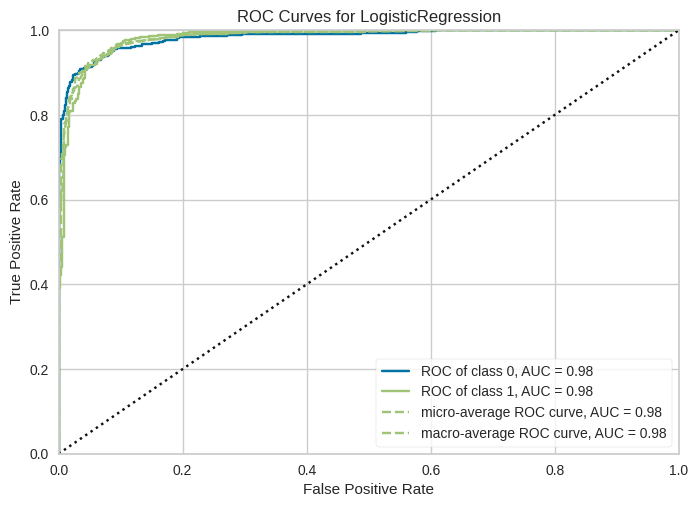

In [ ]:
# OOP API
best = create_model('lr')  # lr adalah kode untuk Logistic Regression

# Plot AUC menggunakan model klasifikasi
plot_model(best, plot='auc')

Logistic Regression adalah salah satu algoritma machine learning yang digunakan untuk masalah klasifikasi, di mana tujuannya adalah untuk memprediksi probabilitas keanggotaan suatu sampel dalam salah satu dari dua kelas. Dalam logistic regression, vektor fitur (x) yang merupakan input data dan ingin memprediksi probabilitas bahwa data tersebut termasuk dalam kelas positif (biasanya direpresentasikan sebagai 1) atau kelas negatif (biasanya direpresentasikan sebagai 0).

**p(X) = 1 / (1 + e^(-z))**

Keterangan :
- **p(X)** adalah probabilitas bahwa data input X termasuk dalam kelas 1 (positif).
- **z** adalah fungasi linear dari vektor fitur X yang didefinisikan sebagai **z = w * X +b**.

Untuk menentukan kelas data, biasanya menggunakan ambang tertentu pada probabilitas yang dihitung. Misalnya, jika p(X) lebih besar dari atau sama dengan 0.5, dapat mengklasifikasikan data tersebut ke dalam kelas 1 (positif). Jika p(X) kurang dari 0.5, mengklasifikasikannya ke dalam kelas 0 (negatif).

Nilai ambang yang lebih rendah akan membuat model lebih rentan terhadap kesalahan positif (data yang seharusnya masuk ke dalam kelas 0 tetapi salah klasifikasi ke dalam kelas 1), sementara nilai ambang yang lebih tinggi akan membuat model lebih rentan terhadap kesalahan negatif (data yang seharusnya masuk ke dalam kelas 1 tetapi salah klasifikasi ke dalam kelas 0).

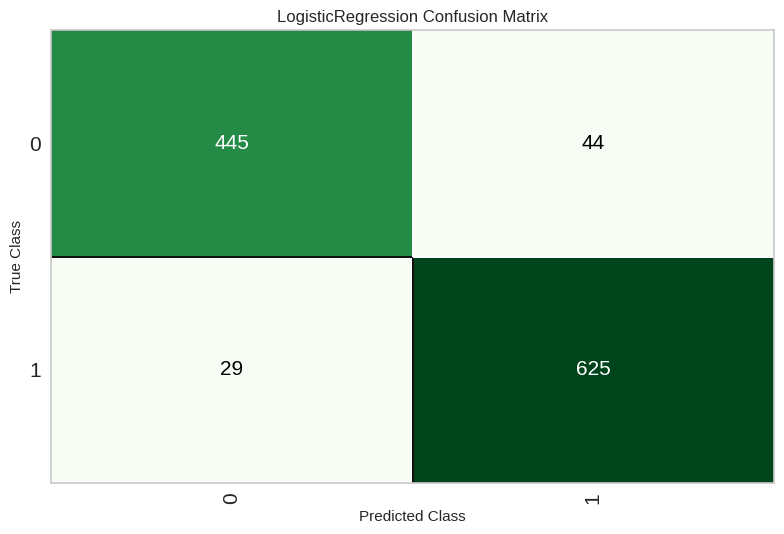

In [ ]:
# OOP API
s.plot_model(best, plot = 'confusion_matrix')

In [ ]:
# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9361,0.9835,0.9361,0.9362,0.9360,0.8690,0.8694


,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS,prediction_label,prediction_score
2756,12754,450.723999,186.267349,88.717300,0.879288,13063,0.801634,1,Osmancik,0.7338
1112,15042,504.720001,214.521210,90.208710,0.907287,15375,0.695616,0,Cammeo,0.9983
383,14489,496.385010,210.036392,88.531563,0.906826,14843,0.615349,0,Cammeo,0.9950
77,14837,499.832001,210.067245,91.268646,0.900685,15263,0.680097,0,Cammeo,0.9973
3009,12309,434.375000,179.001678,88.097229,0.870506,12462,0.680695,1,Osmancik,0.9748
...,...,...,...,...,...,...,...,...,...,...
2938,11545,427.619995,167.412094,89.448921,0.845293,11925,0.632395,1,Osmancik,0.9980
1840,12840,454.404999,184.815186,89.921623,0.873653,13185,0.726655,1,Osmancik,0.8295
2287,10915,419.585999,171.542328,82.831711,0.875695,11246,0.783448,1,Osmancik,0.9894
3447,11146,425.959991,179.801178,79.562553,0.896767,11302,0.581066,1,Osmancik,0.9672


In [ ]:
# OOP API
predictions = s.predict_model(best, data=data_nabila)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9307,0.9798,0.9307,0.9306,0.9306,0.8582,0.8583


,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS,prediction_label,prediction_score
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0,Cammeo,1.0000
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0,Cammeo,0.9915
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0,Cammeo,0.9976
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0,Cammeo,0.5753
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0,Cammeo,0.9992


In [ ]:
# OOP API
predictions = s.predict_model(best, data=data_nabila, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9307,0.9798,0.9307,0.9306,0.9306,0.8582,0.8583


,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS,prediction_label,prediction_score_Cammeo,prediction_score_Osmancik
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0,Cammeo,1.0000,0.0000
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0,Cammeo,0.9915,0.0085
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0,Cammeo,0.9976,0.0024
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0,Cammeo,0.5753,0.4247
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0,Cammeo,0.9992,0.0008


In [ ]:
# OOP API
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AREA', 'PERIMETER', 'MAJORAXIS',
                                              'MINORAXIS', 'ECCENTRICITY',
                                              'CONVEX_AREA', 'EXTENT'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fi...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                     

In [ ]:
# OOP API
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AREA', 'PERIMETER', 'MAJORAXIS',
                                             'MINORAXIS', 'ECCENTRICITY',
                                             'CONVEX_AREA', 'EXTENT'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most